<a href="https://colab.research.google.com/github/ihyaulumuddin044/machineLearning/blob/main/titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster

disini kita akan mencoba memprediksi penumpang yang selamat dan yang tidak menggunakan beberapa algoritma machine learning. untuk data yang lebih dan end point yang dituju bisa langsung kunjungi link kaggle berikut; www.kaggle.com/competitions/titanic/overview/description

# Bagian pertama
 <n/>melihat grafik pada sebaran data yang mungkin mengandung informasi

In [55]:
# import semua library yang di perlukan
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# import file ke notebook
import pandas as pd

# Load CSV file
df = pd.read_csv('train.csv')
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


explorasi data pada dataset

In [56]:
train = pd.read_csv("train.csv")

display(train.head())

print(train.info())
print(train.info())
print(train.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sur

Mari kita mulai dengan kolom Selamat. Kolom ini berisi bilangan bulat 1 atau 0 yang berhubungan dengan selamat (1 = Selamat, 0 = Tidak Selamat)

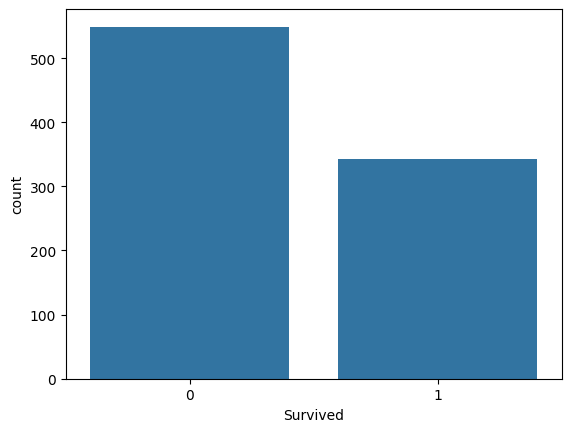

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [57]:
# visulisasi menggunkan countplot
sns.countplot(x="Survived", data=train)
plt.show()

# Print preposisinya
print(train["Survived"].value_counts(normalize=True))

# *Pclass*
Kolom Pclass berisi status sosial ekonomi penumpang. Hal ini dapat menjadi prediktif untuk model kita

<n/>
1 = Atas

<n/>

2 = Menengah
<n/>

3 = Bawah

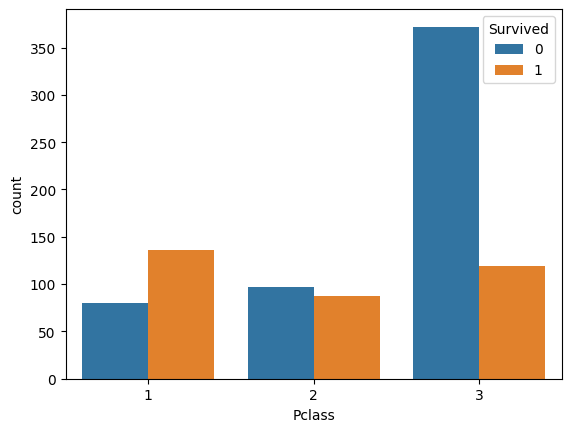

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [58]:
# visualisasi menggunakan countplot
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.show()

# proporsi orang yang selamat di setiap kelas
print(train["Survived"].groupby(train["Pclass"]).mean())

# seberapa banyak orang yang ada di setiap kelas?
print(train["Pclass"].value_counts())

Seperti yang telah diduga, penumpang kelas satu memiliki tingkat kelangsungan hidup yang lebih tinggi. kita akan menggunakan informasi ini dalam data pelatihan kita.

In [59]:
# melihat 5 baris ppertana dari colom!
display(train[["Name"]].head())

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


Kita dapat mengekstrak title dari nama. mungkin kita bisa mendapatkan informasi yang menarik

In [60]:
# mengambil title
train["Title"] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

# mejumlahkan menurut title
print(train["Title"].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


Apakah ada hubungan antara title(gelar) dan bertahan hidup?.

menarik untuk di ketahui apakah ada benang merah atar keduanya!





In [61]:
# Print presentase bertahan hidup berdasarkan title
print(train["Survived"].groupby(train["Title"]).mean().sort_values(ascending=False))

Title
the Countess    1.000000
Mlle            1.000000
Sir             1.000000
Ms              1.000000
Lady            1.000000
Mme             1.000000
Mrs             0.792000
Miss            0.697802
Master          0.575000
Col             0.500000
Major           0.500000
Dr              0.428571
Mr              0.156673
Jonkheer        0.000000
Rev             0.000000
Don             0.000000
Capt            0.000000
Name: Survived, dtype: float64


Ternyata, ada korelasi antara gelar dan tingkat kelangsungan hidup. Di bagian teknik fitur, saya akan mengelompokkan gelar berdasarkan tingkat kelangsungan hidupnya seperti berikut ini


lebih tinggi = bangsawan, nyonya, nona, ibu, tuan, nyonya muda, nyonya tua, tuan

netral = Mayor, Kolonel, Dr

lebih rendah = Tuan, Pendeta, Jonkheer, Don, Kapten

#usia

In [62]:
print(train["Age"].isnull().sum())

177


Ada 177 nilai yang hilang di kolom Usia, kita akan memperhitungkannya di bagian rekayasa fitur. Sekarang, mari kita lihat distribusi usia dengan pengaruh bertahan hidup

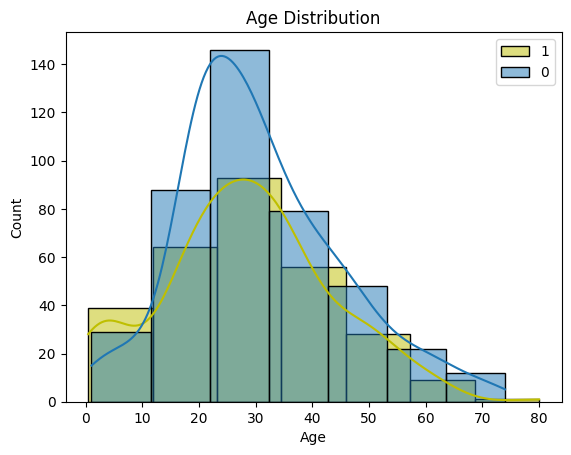

In [63]:
# Bertahan hidup berdasarkan usia
sns.histplot(train[train.Survived == 1]["Age"], color="y", bins=7, label="1", kde=True)

# kematian berdasarkan usia
sns.histplot(train[train.Survived == 0]["Age"], bins=7, label="0", kde=True)

# legend
plt.legend()
plt.title("Age Distribution")
plt.show()

# jenis kelamin

apakah jenis kelamin mempengaruhi rasio bertahan hidup?

apakah laki-laki memiliki tingkat selamat yang lebih tinggi dari perempuan atau sebaliknya!?

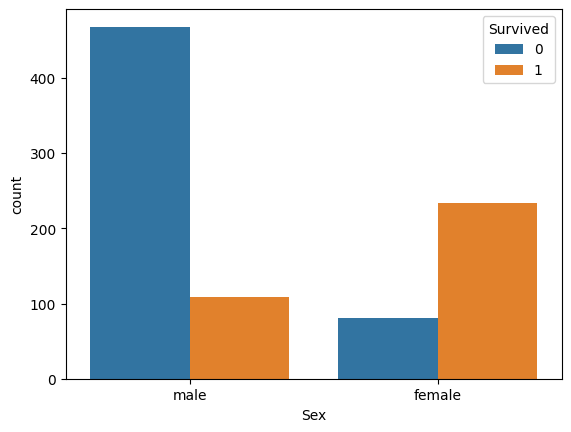

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Sex
male      577
female    314
Name: count, dtype: int64


In [64]:
# vusialisasi countplot
sns.countplot(x="Sex", hue="Survived", data=train)
plt.show()

# jumlah orang-orang yang selamat di setiap kelas
print(train["Survived"].groupby(train["Sex"]).mean())

# seberapa banyak orang yang kita punya?
print(train["Sex"].value_counts())

Jelas, ada hubungan antara jenis kelamin dan bertahan hidup. dan sungguh menarik mengetahui bahwa wanita memiliki rasio bertahan hidup lebih tinggi. kira-kita kenapa bisa demikian?

# SibSp(saudara) & Parch(orang tua)




SibSp = Nomor Saudara Kandung atau Pasangan

Parch = Nomor Orang Tua atau Anak

Kemudian saya memutuskan untuk membuat fitur baru yang disebut ukuran keluarga dengan menjumlahkan kolom SibSp dan Parch

In [65]:
print(train["SibSp"].value_counts())

print(train["Parch"].value_counts())

train["family_size"] = train["SibSp"] + train["Parch"]

print(train["family_size"].value_counts())

# Proportion of people survived for each class
print(train["Survived"].groupby(train["family_size"]).mean().sort_values(ascending=False))

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
family_size
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64
family_size
3     0.724138
2     0.578431
1     0.552795
6     0.333333
0     0.303538
4     0.200000
5     0.136364
7     0.000000
10    0.000000
Name: Survived, dtype: float64


Tampaknya, ukuran keluarga penting untuk bertahan hidup. Saya akan mengelompokkan mereka dalam langkah rekayasa fitur seperti berikut
keluarga besar = jika ukuran keluarga > 3

keluarga kecil = jika ukuran keluarga > 0 dan ukuran keluarga < =3

sendirian = ukuran keluarga == 0

# tiket

Mulanya, saya berpikir bahwa saya akan mengabaikan kolom ini, tetapi setelah melakukan eksplorasi, saya menemukan fitur-fitur yang cukup bermanfaat.

In [66]:
# mari print head colom tiket
print(train["Ticket"].head(15))

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object


Saya hanya mengekstrak huruf pertama dari tiket karena saya pikir huruf tersebut menunjukkan jenis tiket.

In [67]:
# ambil huruf pertama dari setiap tiket
train["Ticket_first"] = train["Ticket"].apply(lambda x: str(x)[0])

# hitunh nilai perhitungan
print(train["Ticket_first"].value_counts())

# rasio bertahan hidup menurut tiket
print(train.groupby("Ticket_first")["Survived"].mean().sort_values(ascending=False))

Ticket_first
3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: count, dtype: int64
Ticket_first
9    1.000000
P    0.646154
1    0.630137
F    0.571429
2    0.464481
C    0.340426
S    0.323077
L    0.250000
3    0.239203
4    0.200000
6    0.166667
W    0.153846
7    0.111111
A    0.068966
5    0.000000
8    0.000000
Name: Survived, dtype: float64


Huruf pertama dari tiket berkorelasi dengan tingkat kelangsungan hidup. kita akan mengelompokkan mereka seperti berikut ini

tingkat kelangsungan hidup yang lebih tinggi = F, 1, P, 9

netral = S, C, 2

tingkat kelangsungan hidup yang lebih rendah = lainnya

# Tarif

Kita dapat membuat histogram untuk menampilkan distribusi Tarif


Fare
(-0.512, 170.776]     871
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: count, dtype: int64


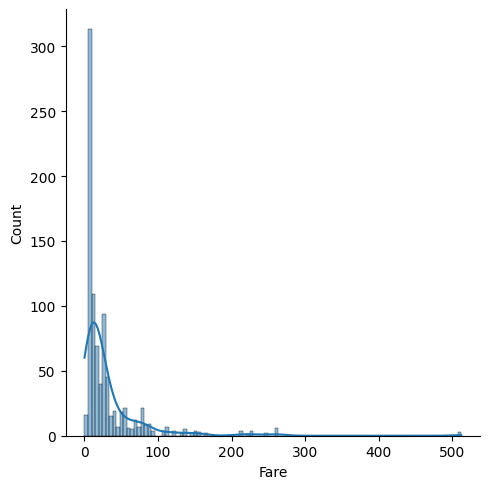

Fare
(-0.512, 170.776]     0.376579
(170.776, 341.553]    0.647059
(341.553, 512.329]    1.000000
Name: Survived, dtype: float64


In [68]:
# Mencetak 3 tempat pada kolom Tarif
print(pd.cut(train['Fare'], 3).value_counts())

# Membuat plot histogram
sns.displot(train["Fare"], kde=True)
plt.show()

#  Cetak Tarif terpilah berdasarkan tarif yang masih berlaku
print(train['Survived'].groupby(pd.cut(train['Fare'], 3), observed=False).mean())

Ada juga hubungan antara tarif tiket dan kelangsungan hidup

# Kabin

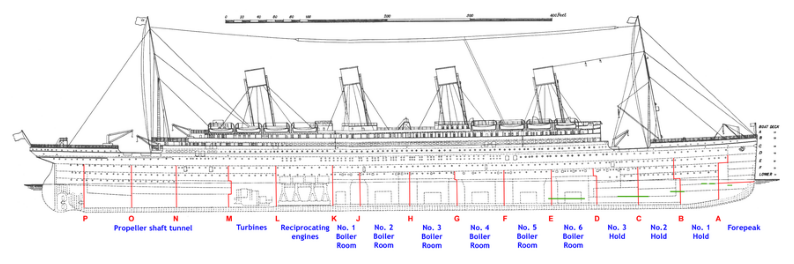

In [69]:
from PIL import Image
import matplotlib.pyplot as plt

# Masukkan nama file gambar
nama_file = "titanic.png"  # Sesuaikan dengan nama file yang diunggah

# Buka dan tampilkan gambar
img = Image.open(nama_file)
plt.figure(figsize=(10, 10))  # Mengatur ukuran gambar
plt.imshow(img)
plt.axis('off')  # Menonaktifkan sumbu
plt.show()



Gambar ini menunjukkan kepada kita bagian yang paling terdampak dari Titanic dan lokasi Kabin. Meskipun ada banyak nilai yang hilang di kolom Kabin, saya memutuskan untuk mengekstrak informasi Kabin untuk mencoba apakah berhasil atau tidak.


In [70]:
  # Menampilkan informasi unik di kolom Cabin (Kabin)

print(train["Cabin"].unique())

#  Ambil huruf pertama dari Kabin

train["Cabin_first"] = train["Cabin"].apply(lambda x: str(x)[0])

#  Menampilkan jumlah nilai cetak huruf pertama

print(train["Cabin_first"].value_counts())

#  Tingkat kelangsungan hidup huruf pertama Kabin

print(train.groupby("Cabin_first")["Survived"].mean().sort_values(ascending=False))

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
Cabin_first
n    687
C     59
B     47
D   

Menurut tarif yang masih berlaku. Saya akan mengelompokkan Kabin seperti berikut ini.

tingkat kelangsungan hidup yang lebih tinggi = D, E, B, F, C

netral = G, A

tingkat kelangsungan hidup yang lebih rendah lainnya

# embarked

Embarked

Embarked adalah fitur kategorikal yang menunjukkan pelabuhan keberangkatan.

C = Cherbourg

Q = Queenstown

S = Southampton


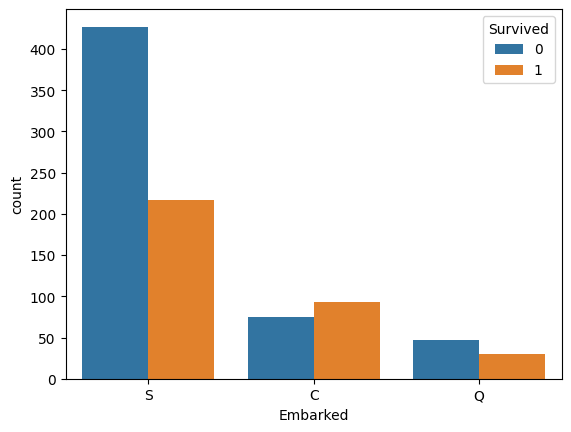

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [71]:
# membuat diagram countplot
sns.countplot(x="Embarked", hue="Survived", data=train)
plt.show()

# menampilkan jumlah
print(train["Embarked"].value_counts())

# jumlah penumpang yang selamat untuk setipa pelayaran
print(train["Survived"].groupby(train["Embarked"]).mean())

Tidak diragukan lagi, C memiliki tingkat kelangsungan hidup yang lebih tinggi. informasi sangat berguna untuk kita nantinya

# Bagian dua (Featuring)

Kita telah belajar banyak dari analisis data eksplorasi. Sekarang kita dapat memulai rekayasa fitur. Pertama, mari kita muat kereta dan set pengujian.

In [72]:
# mengambil data traini dan data tes dari dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


Ada satu nilai yang hilang di kolom Tarif pada set pengujian. kita sebaiknya memperhitungkannya dengan menggunakan rata-rata.

In [73]:
# Masukkan rata-rata ke nilai yang hilang
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

<ipython-input-73-43152380dc75>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(train['Fare'].mean(), inplace = True)


kita bisa menggunkan menggunakan dua jenis Imputer dari sklearn. Imputer iteratif untuk penghitungan usia, dan Imputer sederhana (dengan strategi yang paling sering digunakan) untuk Embarked

In [74]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Contoh DataFrame jika belum ada
# train = pd.DataFrame({
#     'Embarked': ['C', np.nan, 'S', 'C', 'S', np.nan],
#     'Age': [22, 38, 26, np.nan, 35, 29]
# })

# Memastikan kolom 'Embarked' ada dan tidak kosong
if 'Embarked' in train.columns and not train['Embarked'].isnull().all():
    print("Kolom 'Embarked' ditemukan.")
    print("Jumlah nilai hilang di 'Embarked':", train['Embarked'].isnull().sum())

    # Buat imputer untuk kolom 'Embarked'
    imp_embarked = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

    # Menggunakan .ravel() untuk memastikan output adalah array 1D
    train["Embarked"] = imp_embarked.fit_transform(train[["Embarked"]]).ravel()
else:
    print("Data tidak valid untuk 'Embarked'.")

# Proses yang sama untuk kolom 'Age'
if 'Age' in train.columns:
    imp_age = IterativeImputer(max_iter=100, random_state=34, n_nearest_features=2)

    # Menggunakan .ravel() untuk memastikan output adalah array 1D
    train["Age"] = np.round(imp_age.fit_transform(train[["Age"]]).ravel())
else:
    print("Kolom 'Age' tidak ditemukan.")

    print(train[['Embarked', 'Age']].head())  # Menampilkan 5 baris pertama untuk kolom Embarked dan Age



Kolom 'Embarked' ditemukan.
Jumlah nilai hilang di 'Embarked': 2



Kami juga mengkodekan kolom jenis kelamin.

In [75]:
from sklearn.preprocessing import LabelEncoder

# inisialisasi label
le = LabelEncoder()

# mengkodekan jenis kelamin
train["Sex"] = le.fit_transform(train[["Sex"]].values.ravel())
test["Sex"] = le.fit_transform(test[["Sex"]].values.ravel())

Di EDA, kami memutuskan untuk menggunakan fitur ukuran family

In [76]:
# ukuran keluarga
train["Fsize"] = train["SibSp"] + train["Parch"]
test["Fsize"] = test["SibSp"] + test["Parch"]

In [77]:
# Ticket first letters and Cabin first letters are also needed
# huruf pertaman tiket
train["Ticket"] = train["Ticket"].apply(lambda x: str(x)[0])
test["Ticket"] = test["Ticket"].apply(lambda x: str(x)[0])

# huruf pertama kabin
train["Cabin"] = train["Cabin"].apply(lambda x: str(x)[0])
test["Cabin"] = test["Cabin"].apply(lambda x: str(x)[0])

In [78]:
# mengekstrak title atau gelar
# Titles
train["Title"] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test["Title"] = test['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

Sekarang, kita memerlukan beberapa fungsi tambahan untuk mengelompokkan kategori kita

In [79]:
# Mengelompokkan kolom family size
def assign_passenger_label(family_size):
    if family_size == 0:
        return "Alone"
    elif family_size <=3:
        return "Small_family"
    else:
        return "Big_family"

# Mengelompokkan kolom Ticket column
def assign_label_ticket(first):
    if first in ["F", "1", "P", "9"]:
        return "Ticket_high"
    elif first in ["S", "C", "2"]:
        return "Ticket_middle"
    else:
        return "Ticket_low"

# Mengelompokkan kolom Title column
def assign_label_title(title):
    if title in ["the Countess", "Mlle", "Lady", "Ms", "Sir", "Mme", "Mrs", "Miss", "Master"]:
        return "Title_high"
    elif title in ["Major", "Col", "Dr"]:
        return "Title_middle"
    else:
        return "Title_low"

# Mengelompokkan kolom Cabin column
def assign_label_cabin(cabin):
    if cabin in ["D", "E", "B", "F", "C"]:
        return "Cabin_high"
    elif cabin in ["G", "A"]:
        return "Cabin_middle"
    else:
        return "Cabin_low"

In [80]:
# Family size
train["Fsize"] = train["Fsize"].apply(assign_passenger_label)
test["Fsize"] = test["Fsize"].apply(assign_passenger_label)

# Ticket
train["Ticket"] = train["Ticket"].apply(assign_label_ticket)
test["Ticket"] = test["Ticket"].apply(assign_label_ticket)

# Title
train["Title"] = train["Title"].apply(assign_label_title)
test["Title"] = test["Title"].apply(assign_label_title)

# Cabin
train["Cabin"] = train["Cabin"].apply(assign_label_cabin)
test["Cabin"] = test["Cabin"].apply(assign_label_cabin)

In [81]:
train = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Cabin","Title", "Fsize"], data=train, drop_first=True)
test = pd.get_dummies(columns=["Pclass", "Embarked", "Ticket", "Cabin", "Title", "Fsize"], data=test, drop_first=True)

In [82]:
target = train["Survived"]
train.drop(["Survived", "SibSp", "Parch", "Name", "PassengerId"], axis=1, inplace=True)
test.drop(["SibSp", "Parch", "Name","PassengerId"], axis=1, inplace=True)

inilah tampilan akhirnya!

In [83]:
display(train.head())
display(test.head())

print(train.info())
print(test.info())

,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle,Fsize_Big_family,Fsize_Small_family
0,1,22.0,7.2500,False,True,False,True,True,False,True,False,True,False,False,True
1,0,38.0,71.2833,False,False,False,False,False,False,False,False,False,False,False,True
2,0,26.0,7.9250,False,True,False,True,False,True,True,False,False,False,False,False
3,0,35.0,53.1000,False,False,False,True,False,False,False,False,False,False,False,True
4,1,35.0,8.0500,False,True,False,True,True,False,True,False,True,False,False,False


,Sex,Age,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Ticket_Ticket_low,Ticket_Ticket_middle,Cabin_Cabin_low,Cabin_Cabin_middle,Title_Title_low,Title_Title_middle,Fsize_Big_family,Fsize_Small_family
0,1,34.5,7.8292,False,True,True,False,True,False,True,False,True,False,False,False
1,0,47.0,7.0000,False,True,False,True,True,False,True,False,False,False,False,True
2,1,62.0,9.6875,True,False,True,False,False,True,True,False,True,False,False,False
3,1,27.0,8.6625,False,True,False,True,True,False,True,False,True,False,False,False
4,0,22.0,12.2875,False,True,False,True,True,False,True,False,False,False,False,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sex                   891 non-null    int64  
 1   Age                   891 non-null    float64
 2   Fare                  891 non-null    float64
 3   Pclass_2              891 non-null    bool   
 4   Pclass_3              891 non-null    bool   
 5   Embarked_Q            891 non-null    bool   
 6   Embarked_S            891 non-null    bool   
 7   Ticket_Ticket_low     891 non-null    bool   
 8   Ticket_Ticket_middle  891 non-null    bool   
 9   Cabin_Cabin_low       891 non-null    bool   
 10  Cabin_Cabin_middle    891 non-null    bool   
 11  Title_Title_low       891 non-null    bool   
 12  Title_Title_middle    891 non-null    bool   
 13  Fsize_Big_family      891 non-null    bool   
 14  Fsize_Small_family    891 non-null    bool   
dtypes: bool(12), float64(2)

# bagian tiga (Machine Learning)

Untuk mengevaluasi performa model kita, kita perlu membagi data latih ke dalam set pelatihan dan pengujian.

In [84]:
from sklearn.model_selection import train_test_split

# Memilih fitur dan target
X = train.values  # Fitur diambil dari DataFrame 'train'
y = target.values  # Target diambil dari variabel 'target'

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)


Saya telah menggunakan GridSearchCV untuk menyetel Pengklasifikasi Random  Forest saya

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Inisialisasi RandomForestClassifier
rf = RandomForestClassifier(random_state=34)

# Definisikan parameter untuk pencarian acak
params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 10, 15],
    'criterion': ['entropy', 'gini'],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt'],  # Ubah dari 'auto' ke 'sqrt'
    'min_samples_split': [3, 5, 10],
}

# Mencari hyperparameter terbaik menggunakan RandomizedSearchCV
clf = RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=10, cv=3, n_jobs=-1, random_state=34)

# Melatih model dengan data pelatihan
clf.fit(X_train, y_train.ravel())

# Menampilkan estimator terbaik dan skor terbaik
print(clf.best_estimator_)
print(clf.best_score_)

rf_best = clf.best_estimator_

# Memprediksi dari set pengujian
y_pred = clf.predict(X_test)

# Mencetak akurasi menggunakan fungsi accuracy_score
print("Akurasi: ", accuracy_score(y_test, y_pred))

# Mencetak matriks kebingungan
print("\nMatriks Kebingungan\n")
print(confusion_matrix(y_test, y_pred))


RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50, random_state=34)
0.8483258282215841
Akurasi:  0.7932960893854749

Matriks Kebingungan

[[98 12]
 [25 44]]


In [90]:
# menyimpan model
import pickle
pickle.dump(rf_best, open("model.pkl", 'wb'))

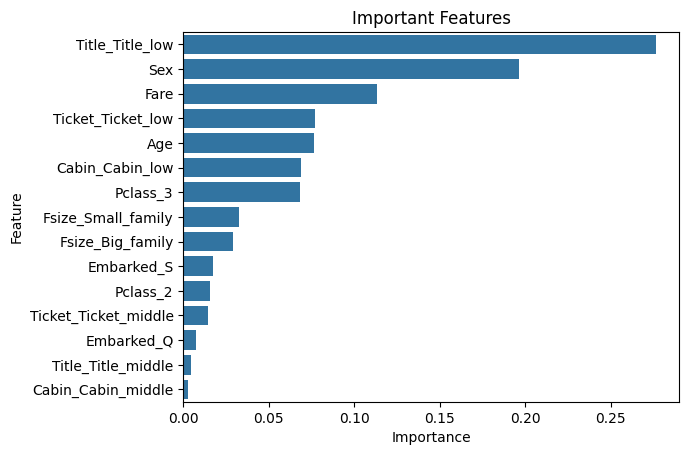

In [91]:
# Membuat pandas Series dengan pentingnya fitur
importance = pd.Series(rf_best.feature_importances_, index=train.columns).sort_values(ascending=False)

# Menggunakan seaborn untuk membuat barplot
sns.barplot(x=importance, y=importance.index)

# Menambahkan label pada grafik
plt.xlabel('Importance')  # Label sumbu x
plt.ylabel('Feature')     # Label sumbu y
plt.title("Important Features")  # Judul grafik
plt.show()  # Menampilkan grafik


In [94]:
from sklearn.ensemble import RandomForestClassifier

# Menginisialisasi RandomForestClassifier dengan oob_score
last_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=50,
    random_state=34,
    oob_score=True  # Tambahkan ini untuk menghitung OOB score
)

# Melatih model dengan data pelatihan
last_clf.fit(train, target)

# Mencetak OOB Score
print("OOB Score: %.4f" % last_clf.oob_score_)


OOB Score: 0.8260


In [99]:
# Menyimpan ID penumpang
ids = pd.read_csv("test.csv")[["PassengerId"]].values

# Membuat prediksi
predictions = last_clf.predict(test.values)

# Mencetak prediksi
print(predictions)

# Membuat sebuah dictionary dengan ID penumpang dan prediksi
df = {'PassengerId': ids.ravel(), 'Survived': predictions}

# Membuat DataFrame bernama submission
submission = pd.DataFrame(df)

# Menampilkan lima baris pertama dari submission
display(submission.head())

# Menyimpan file
submission.to_csv("submission_last.csv", index=False)


[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
